<a href="https://colab.research.google.com/github/kwanhong66/TodayILearned/blob/master/kaggle/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mushroom Classification
- https://www.kaggle.com/uciml/mushroom-classification
- Content
  - 23 species of mushrooms
  - Each species is identified as definitely edible, definitely posionous or of unknown edibility and not recommended(considered as posionous).
- Inspiration
  - What types of machine learning models perform best on this dataset?
  - Which features are most indicative of a poisonous mushroom?

## Import packages

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [0]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Load dataset

In [0]:
data_root_dir = '/content/drive/My Drive/Colab Notebooks/data'
mushrooms = pd.read_csv(os.path.join(data_root_dir, 'mushroom_classification/mushrooms.csv'))

Mushroom dataset has 8124 rows and 23 columns
- First column is class which has two class

In [0]:
mushrooms.shape

(8124, 23)

This dataset has only categorical features
- string values need to be encoded

In [0]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [0]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [0]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Checks if there is null values

In [0]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## EDA (Exploratory Data Analysis)

Visualize the plot of the number of mushrooms for each cap-color

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64


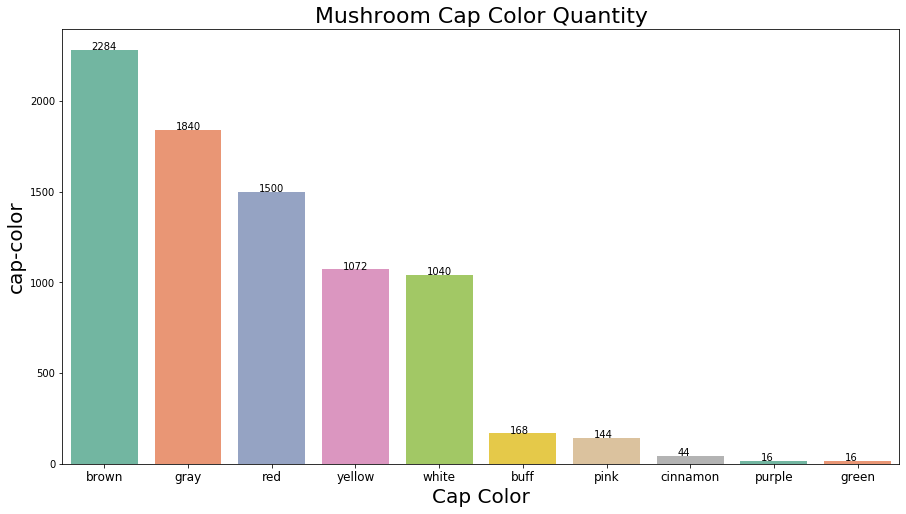

In [0]:
# draw barplot to display the number of mushrooms for each cap-color
cap_colors = mushrooms['cap-color'].value_counts()
print(cap_colors)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
cap_colors.index = ('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green')
ax.set_xticklabels(cap_colors.index, fontsize = 12)

# ax.set(ylabel='Quantity', title='The number of mushrooms for each cap-color')
bp = sns.barplot(y=cap_colors, x=cap_colors.index, ax=ax, palette='Set2')
for p, label in zip(bp.patches, mushrooms['cap-color'].value_counts()):
    bp.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

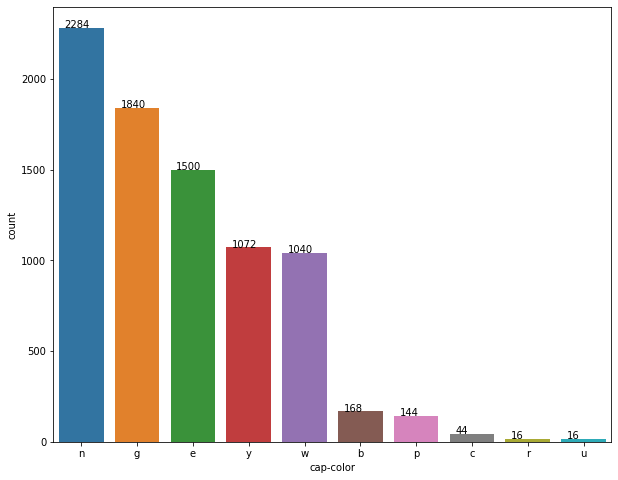

In [0]:
plt.figure(figsize=(10,8))
ax = sns.countplot(mushrooms['cap-color'],
              order=mushrooms['cap-color'].value_counts().index)

for p, label in zip(ax.patches, mushrooms['cap-color'].value_counts()):
    ax.annotate(label, (p.get_x()+0.1, p.get_height()+0.3))

Visualize the plot of the number of mushrooms which are edible or posionous based on cap-color

n    1264
g    1032
w     720
e     624
y     400
p      56
b      48
c      32
r      16
u      16
Name: cap-color, dtype: int64
n    1020
e     876
g     808
y     672
w     320
b     120
p      88
c      12
Name: cap-color, dtype: int64


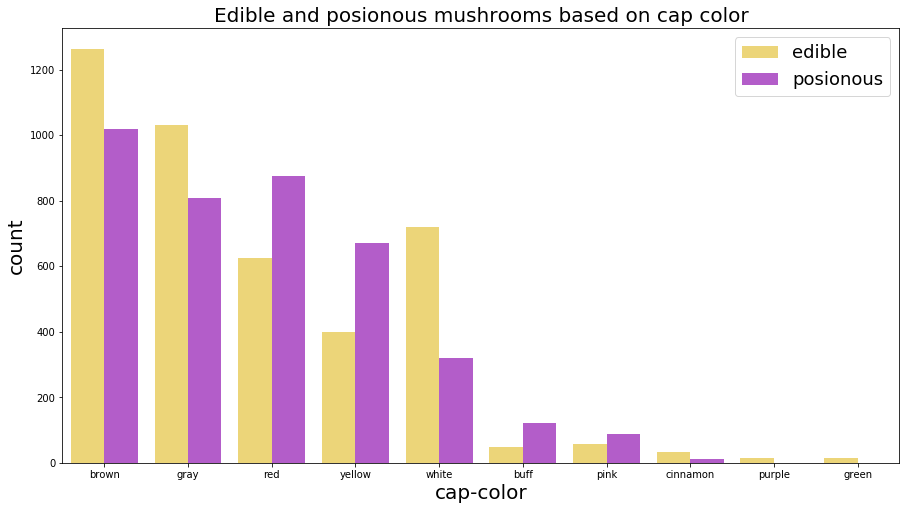

In [0]:
# poisonous_cc = [] #Poisonous color cap list
# edible_cc = []    #Edible color cap list
# for capColor in cap_color_labels:
#     size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
#     edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
#     edible_cc.append(edibles)
#     poisonous_cc.append(size-edibles)

edible_cap_colors = mushrooms.loc[mushrooms['class'] == 'e']['cap-color']
posionous_cap_colors = mushrooms.loc[mushrooms['class'] == 'p']['cap-color']

print(edible_cap_colors.value_counts())
print(posionous_cap_colors.value_counts())

fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Edible and posionous mushrooms based on cap color', fontsize=20)
ax.set_xlabel('Cap Color', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

cp = sns.countplot(x='cap-color',
              data=mushrooms,
              hue='class',
              hue_order=['e', 'p'],
              order=mushrooms['cap-color'].value_counts().index,
              palette=['#ffe066', '#be4bdb'],
              ax=ax)

cp.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'))
cp.legend(('edible', 'posionous'), fontsize=18, loc=1)

Visualize the plot of the number of mushrooms for each odor

n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64


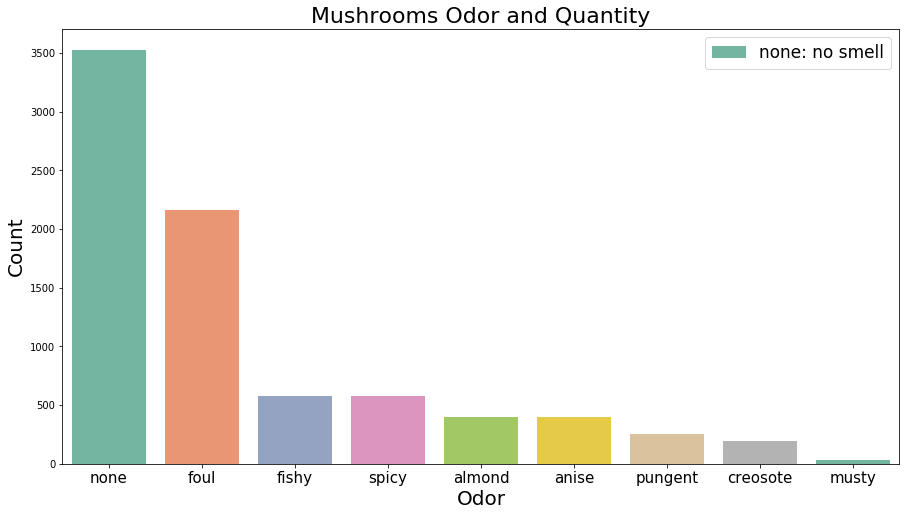

In [0]:
odors = mushrooms['odor'].value_counts()
print(odors)

# fig, ax = plt.subplots(figsize=(15, 8))
plt.figure(figsize=(15,8))
# ax = sns.barplot(y=odors, x=odors.index, palette='Set2')
# https://stackoverflow.com/questions/43585333/seaborn-countplot-set-legend-for-x-values
ax = sns.countplot(x='odor',
                   data=mushrooms,
                   order=odors.index,
                   palette='Set2')

ax.set_xlabel('Odor', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Mushrooms Odor and Quantity', fontsize=22)

ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 15)

ax.legend(['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
           'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
           'creosote: smoky chimney', 'musty: mold mildew'], fontsize=17)